In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

import os, sys

## add root directory to path, to allow for imports 
root_dir = os.path.dirname(os.path.abspath(os.getcwd()))
if not root_dir in sys.path: sys.path.append(root_dir)

from darkMatter import darkMatter
from utils.plots import *
from utils.parameters import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


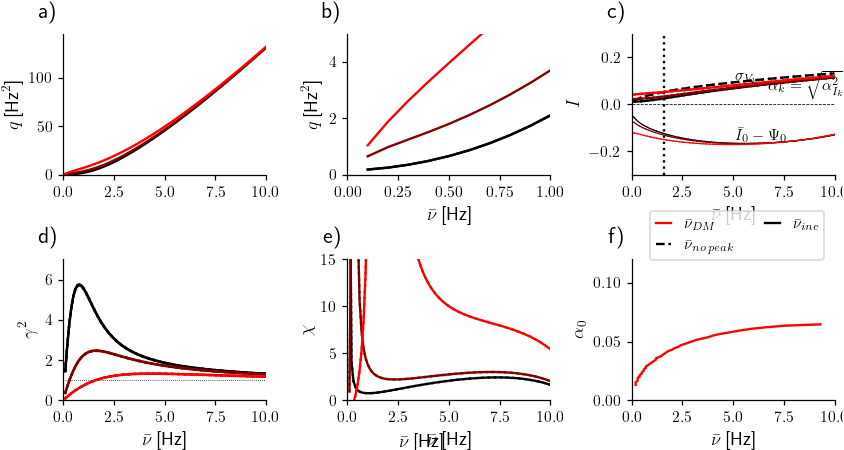

3 100


In [11]:
## set model parameters and options
steps = 100
options = set_options(L=1,nI=1,nE=1)

options['simulation'] = {
    #'eta': [0.,np.sqrt(1/2.)],
    #'eps': [0.,0.7],
    'rateWnt': [0,10],
    'alpha_0': [0.01,0.02,0.04],
    'sim_prim': [0,-1,0],
    'sim_sec': [0,-1,0]
}
options['mode_stats'] = 1
options['tau_I'][0] = 0.02

x_key = [o for o in list(options['simulation']) if not o.startswith('sim')][0]
## execute code
res = darkMatter(steps=steps,options=options,rerun=True,compile=False,logging=3)

## prepare plots
set_plot_params()
plt_para = {
    'title': {
        'descr': False,
        'x_offset': -0.2
        },
    'x': {
        'key': x_key, 
        'lim': 10
        },
}

fig, ax = plt.subplots(2,3,figsize=(7.5,4),dpi=75)

## general axis, which only provides labels
big_ax = plt.axes([0.1,0.05,0.8,0.8])
big_ax.set_facecolor('none')
big_ax.tick_params(labelcolor='none',top='off',bottom='off',left='off',right='off')
big_ax.spines[['top','right','bottom','left']].set_visible(False)
plt.setp(big_ax,xticks=[],yticks=[])

if x_key == 'rateWnt':
    big_ax.set_xlabel(r'$\displaystyle \bar{\nu}\,$[Hz]')
elif x_key == 'eps':
    big_ax.set_xlabel(r'$\displaystyle \varepsilon$')
elif x_key == 'n':
    big_ax.set_xlabel(r'$\displaystyle b$')

## call plotting options
plot_q(ax[0,0],res,plt_para,order=0)
plot_q_zoom(ax[0,1],res,plt_para|{'x':{'key': plt_para['x']['key'], 'lim':1}},order=0)
plot_currents(ax[0,2],res,plt_para,order=0)
plot_gamma(ax[1,0],res,plt_para,order=0)
plot_chi(ax[1,1],res,plt_para,order=0)


options['simulation'] = {
    #'eta': [0.,np.sqrt(1/2.)],
    #'eps': [0.,0.7],
    'rateWnt': [0,10],
    'alpha_0': [0.,0.12],
    'sim_prim': [0,-1,0],
    'sim_sec': [0,-1,0]
}


results_bounds = darkMatter(steps=100,options=options,rerun=True)
plot_regions(ax[1,2],results_bounds,plt_para|{'x':{'key':plt_para['x']['key'],'lim':10.}},order=0)

plt.subplots_adjust(left=0.075, bottom=0.11, right=0.99, top=0.925, wspace=0.4, hspace=0.6)
for i in range(2):
    for j in range(3):
        set_title(ax[i,j],1+j+3*i,'',(-0.075,0),10)
        plt.setp(ax[0,0],xlabel='')
        
        ax[i,j].spines[['top','right']].set_color('none')
        ax[i,j].xaxis.set_ticks_position('bottom')
        ax[i,j].yaxis.set_ticks_position('left')

save=False
if save:
    sv_name = './figures/heterogeneity.%s' % (file_format)
    plt.savefig(sv_name,format=file_format,dpi=600)
    print('Figure saved as "%s"' % sv_name)

In [12]:
res.keys()

dict_keys(['rateWnt', 'alpha_0', 'q', 'gamma', 'delta', 'rate_max', 'chi', 'I_balance', 'inc_trans', 'imp_trans', 'DM_trans', 'np_trans', 'regions', 'alpha_raw', 'alpha', 'sigma_V'])

resizing to 100
resizing to 100
steps: 100, 3
trans_dimids: 2,3,1


<IPython.core.display.Javascript object>


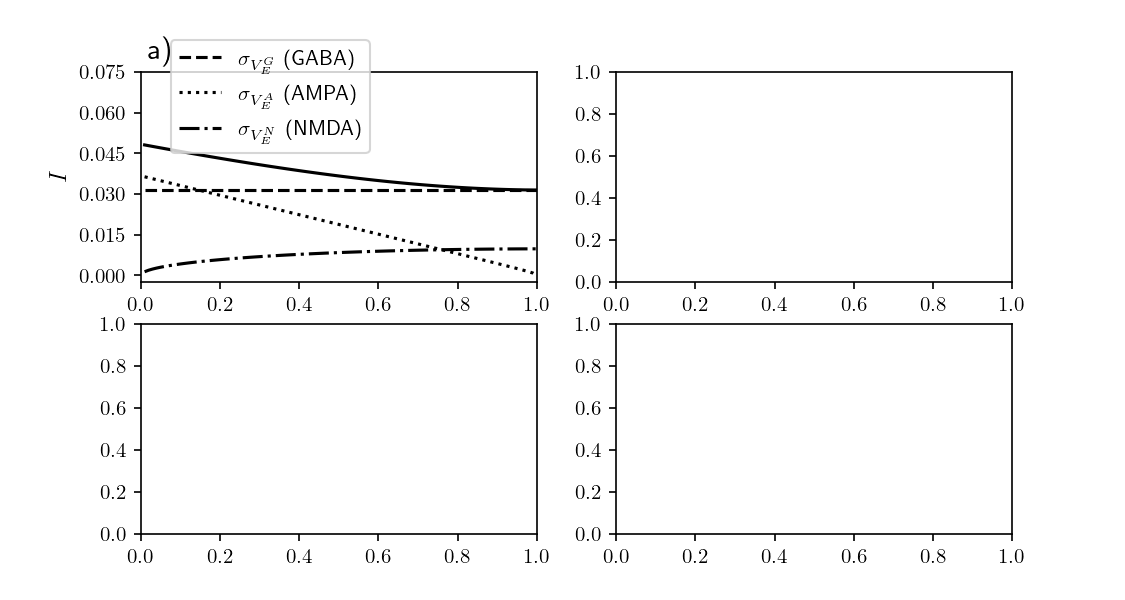

Text(0.05, 1.0, 'a)')

In [128]:
options = set_options(L=1,nI=1,nE=1)

options['simulation'] = {
    'tau_n': [0.,1.],
    'rateWnt': [1.,2.,5.],
    'sim_prim': [0,-1,0],
    'sim_sec': [0,-1,0]
}
options['mode_stats'] = 1
options['tau_I'][0] = 0.02

x_key = [o for o in list(options['simulation']) if not o.startswith('sim')][0]

res = darkMatter(steps=100,options=options,rerun=True,compile=False,logging=3)

fig, ax = plt.subplots(2,2,figsize=(7.5,4))
#ax[0,0].set_position([0.1,0.25,0.22,0.6])
#ax[0,1].set_position([0.415,0.25,0.22,0.6])
#ax[0,2].set_position([0.76,0.25,0.22,0.6])

#ax[0,0].legend(prop={'size':10},loc='lower left')

tau_M = options['tau_M']

tau_G = options['tau_I'][0]    ## GABA
tau_A = options['tau_I'][1]    ## AMPA
tau_N = options['tau_I'][2]    ## NMDA

eps = options['eps']
eta = options['eta']

n = res['tau_n']
rateWnt = res['rateWnt']


J_EE = eta * eps*tau_M
J_EI = np.sqrt(1-(eta*eps)**2)*tau_M

var_V_A = J_EE**2 * rateWnt[0] / (tau_A + tau_M) * ( (1-n)**2/2 + (1-n)*n*tau_A / (tau_A + tau_N) )
#from excitatory NMDA synapses
var_V_N = J_EE**2 * rateWnt[0] / (tau_N + tau_M) * (n**2/2 + (1-n)*n*tau_N / (tau_A + tau_N) );
#from inhibitory GABA synapses
var_V_G = J_EI**2 * rateWnt[0] * 0.5 / (tau_G + tau_M)*np.ones_like(n)

ax[0,0].plot(res[x_key],np.sqrt(var_V_G),'k--',label=r'$\displaystyle \sigma_{V_E^G}$ (GABA)')
ax[0,0].plot(res[x_key],np.sqrt(var_V_A),'k:',label=r'$\displaystyle \sigma_{V_E^A}$ (AMPA)')
ax[0,0].plot(res[x_key],np.sqrt(var_V_G+var_V_A),'k-')
if all(n) > 0:
    ax[0,0].plot(res[x_key],np.sqrt(var_V_N),'k-.',label=r'$\displaystyle \sigma_{V_E^N}$ (NMDA)')
    ax[0,0].legend(prop={'size':10},bbox_to_anchor=(0.05,1.2),loc='upper left',ncol=1)
else:
    ax[0,0].text(0.2,0.005,r'$\displaystyle \sigma_{V_{EE}}$ (AMPA) $\displaystyle \hat{=} \sigma_{V_E^A}$',fontsize=10)
    ax[0,0].text(0.1,0.038,r'$\displaystyle \sigma_{V_{EI}}$ (GABA) $\displaystyle \hat{=} \sigma_{V_E^G}$',fontsize=10)

if x_key == 'rate':
    plt.setp(ax[0,0],xticks=np.linspace(0,10,6),yticks=np.linspace(0,0.15,4),xlim=[0,res[x_key][-1]],ylim=[0,0.15])
else:
    #plt.setp(ax[0,0],xticks=np.linspace(0,1,6),yticks=np.linspace(0,0.075,4),xlim=[0,res[x_key][0][-1]])#,ylim=[0,0.075])
    plt.setp(ax[0,0],xticks=np.linspace(0,1,6),yticks=np.linspace(0,0.075,6),xlim=[0,res[x_key][-1]])
ax[0,0].set_ylabel(r'$\displaystyle I$')
x_title=0.05
ax[0,0].set_title(r'a)',position=(x_title,1.05))